In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from time import time
import multiprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing the data

In [22]:
#loading the data from the csv files to a pandas dataframe
calories = pd.read_csv('/home/dsc520/dsc520/dsc520-2023-nikitarego/FinalProject/calories.csv')


In [23]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [24]:
exercise_data = pd.read_csv('/home/dsc520/dsc520/dsc520-2023-nikitarego/FinalProject/exercise.csv')

In [25]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two dataframes

In [26]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [27]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [28]:
# checking fo the number of rows and columns
calories_data.shape

(15000, 9)

In [29]:
# information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [30]:
#checking for the missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [31]:
# statistical measures of the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [32]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

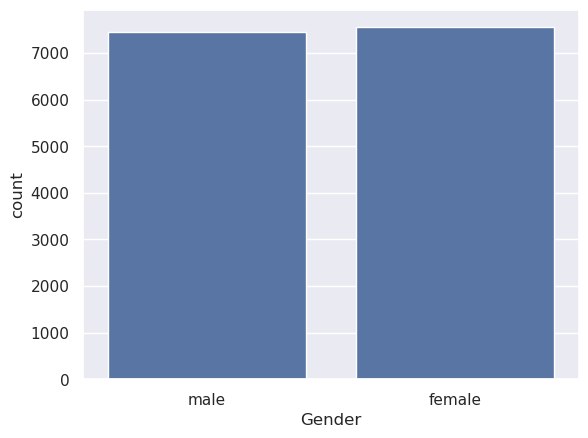

In [33]:
# plotting for the gender cloumn using count plot
sns.countplot(calories_data, x='Gender')

<Axes: xlabel='Age', ylabel='Density'>

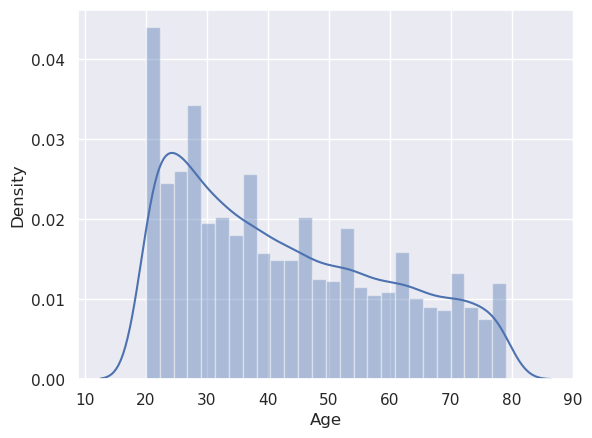

In [34]:
# distribution of "Age" column
sns.distplot(calories_data['Age'])

<Axes: xlabel='Height', ylabel='Density'>

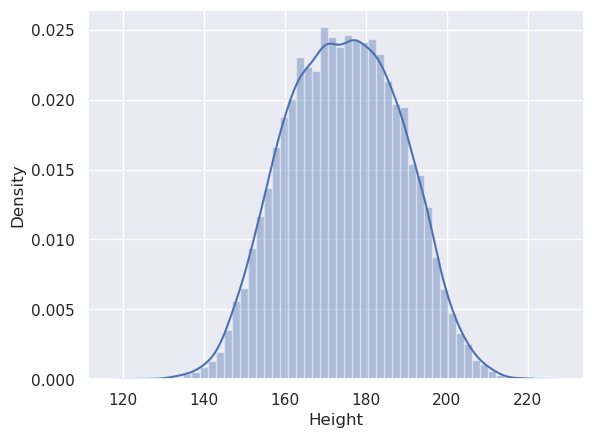

In [35]:
# distribution of "Height" column
sns.distplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

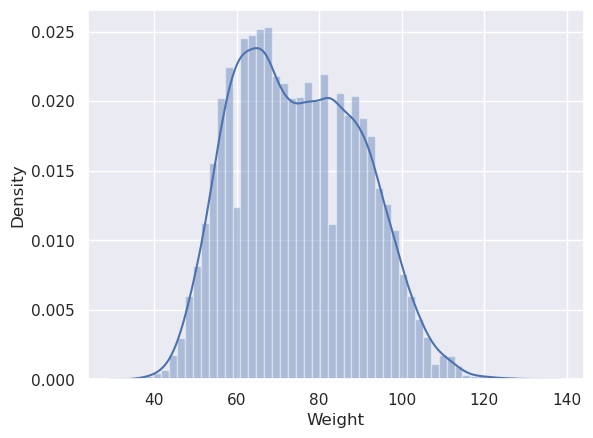

In [36]:
# distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
calories_data['Gender'] = label_encoder.fit_transform(calories_data['Gender'])
correlation = calories_data.corr()

In [38]:
correlation = calories_data.corr()

<Axes: >

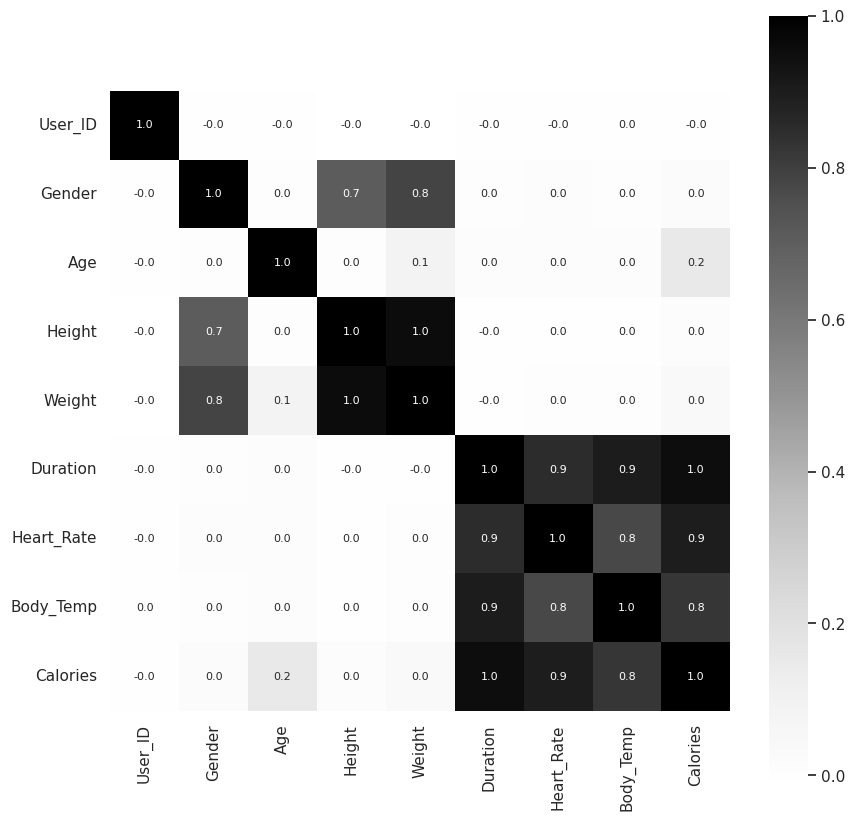

In [39]:
# a heatmap to understant the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greys')


Converting the text data to numerical values

In [40]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [41]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and target

In [42]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [43]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [44]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into train data and test data

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

`Random Forest Regressor`



In [47]:
model3 = RandomForestRegressor()
model3.fit(X_train, Y_train)

RandomForestRegressor()

In [48]:
RFR_data_prediction = model3.predict(X_test)
print("Predicted Calories ", RFR_data_prediction)
print(Y_test)

Predicted Calories  [128.3  223.82  36.6  ... 146.1   23.88  89.56]
7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64


In [49]:
mae = metrics.mean_absolute_error(Y_test, RFR_data_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.6855433333333336


In [50]:
input_data = (1,20,166.0,60.0,14.0,94.0,40.3)

input_data_as_nparray = np.asarray(input_data)

input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)

print('The Predicted Calories Burnt is : ', prediction[0])

The Predicted Calories Burnt is :  53.46


### Serial vs Parallel code


Training Time with 1 cores: 5.120361804962158 seconds
Prediction Time with 1 cores: 0.014417171478271484 seconds
Training Time with 2 cores: 2.9740958213806152 seconds
Prediction Time with 2 cores: 0.05947685241699219 seconds
Training Time with 3 cores: 1.878920555114746 seconds
Prediction Time with 3 cores: 0.0788259506225586 seconds
Training Time with 4 cores: 1.6114997863769531 seconds
Prediction Time with 4 cores: 0.07489633560180664 seconds
Training Time with 5 cores: 1.3116259574890137 seconds
Prediction Time with 5 cores: 0.07268977165222168 seconds
Training Time with 6 cores: 1.1942431926727295 seconds
Prediction Time with 6 cores: 0.07463645935058594 seconds
Training Time with 7 cores: 1.086803674697876 seconds
Prediction Time with 7 cores: 0.062395334243774414 seconds
Training Time with 8 cores: 1.0766754150390625 seconds
Prediction Time with 8 cores: 0.06440496444702148 seconds


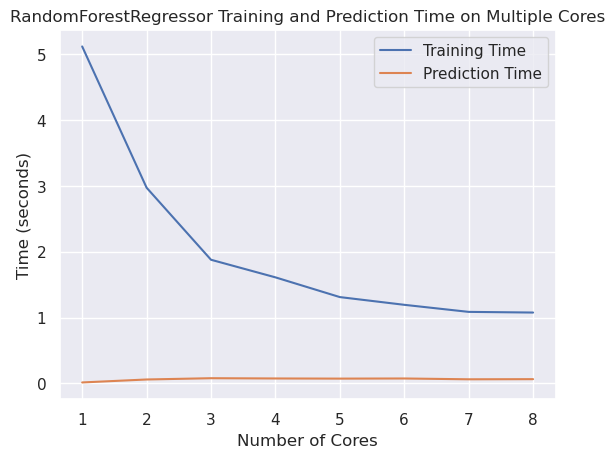

In [51]:
# Import the os module
import os

# Encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = encoder.fit_transform(X_test[['Gender']])
X_test_encoded = np.hstack((X_test.drop(columns=['Gender']).to_numpy(), gender_encoded))

# Initialize lists to store time values
training_times = []
prediction_times = []

# Iterate over different number of cores
for n_cores in range(1, min(9, os.cpu_count() + 1)):
    # Measure time for training
    start_time = time()
    model_parallel = RandomForestRegressor(n_jobs=n_cores)
    model_parallel.fit(X_train, Y_train)
    training_time = time() - start_time
    training_times.append(training_time)
    print(f"Training Time with {n_cores} cores: {training_time} seconds")

    # Measure time for prediction
    start_time = time()
    RFR_data_prediction_parallel = model_parallel.predict(X_test_encoded)
    prediction_time = time() - start_time
    prediction_times.append(prediction_time)
    print(f"Prediction Time with {n_cores} cores: {prediction_time} seconds")

# Plot the results
plt.plot(range(1, min(9, os.cpu_count() + 1)), training_times, label='Training Time')
plt.plot(range(1, min(9, os.cpu_count() + 1)), prediction_times, label='Prediction Time')
plt.xlabel('Number of Cores')
plt.ylabel('Time (seconds)')
plt.title('RandomForestRegressor Training and Prediction Time on Multiple Cores')
plt.legend()
plt.show()


Training Time with 1 cores: 4.539402484893799 seconds
Prediction Time with 1 cores: 0.017961978912353516 seconds
Accuracy with 1 cores: 117.76879999999998
Training Time with 2 cores: 2.24949312210083 seconds
Prediction Time with 2 cores: 0.06908011436462402 seconds
Accuracy with 2 cores: 115.00488
Training Time with 3 cores: 1.7663867473602295 seconds
Prediction Time with 3 cores: 0.11071157455444336 seconds
Accuracy with 3 cores: 116.67467999999997
Training Time with 4 cores: 1.4470269680023193 seconds
Prediction Time with 4 cores: 0.06067705154418945 seconds
Accuracy with 4 cores: 118.16153333333337
Training Time with 5 cores: 1.2838842868804932 seconds
Prediction Time with 5 cores: 0.057767629623413086 seconds
Accuracy with 5 cores: 116.10130000000005
Training Time with 6 cores: 1.156428575515747 seconds
Prediction Time with 6 cores: 0.05879330635070801 seconds
Accuracy with 6 cores: 116.35610000000001
Training Time with 7 cores: 1.0908892154693604 seconds
Prediction Time with 7 cor

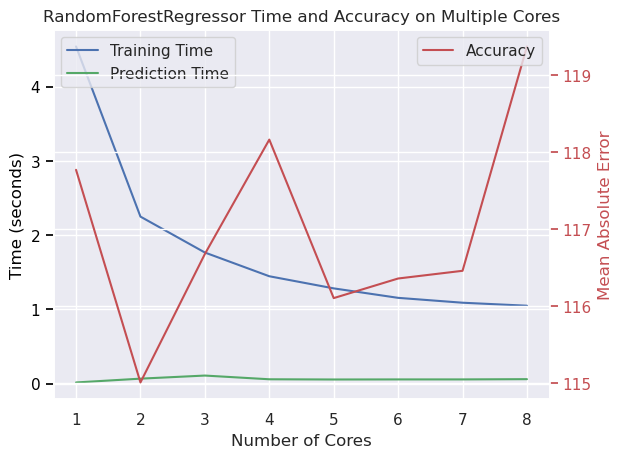

In [52]:
# Assuming X_train, Y_train, X_test, Y_test are already defined

# Encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = encoder.fit_transform(X_test[['Gender']])
X_test_encoded = np.hstack((X_test.drop(columns=['Gender']).to_numpy(), gender_encoded))

# Initialize lists to store time and accuracy values
training_times = []
prediction_times = []
accuracies = []

# Iterate over different numbers of cores
for n_cores in range(1, min(9, os.cpu_count() + 1)):  # Limit to the actual number of physical cores
    # Measure time for training
    start_time = time()
    model_parallel = RandomForestRegressor(n_jobs=n_cores)
    model_parallel.fit(X_train, Y_train)
    training_time = time() - start_time
    training_times.append(training_time)

    # Measure time for prediction
    start_time = time()
    RFR_data_prediction_parallel = model_parallel.predict(X_test_encoded)
    prediction_time = time() - start_time
    prediction_times.append(prediction_time)

    # Evaluate accuracy
    accuracy = metrics.mean_absolute_error(Y_test, RFR_data_prediction_parallel)
    accuracies.append(accuracy)
    print(f"Training Time with {n_cores} cores: {training_time} seconds")
    print(f"Prediction Time with {n_cores} cores: {prediction_time} seconds")
    print(f"Accuracy with {n_cores} cores: {accuracy}")

# Plot the results
fig, ax1 = plt.subplots()

# Plot training and prediction times on the first y-axis
ax1.plot(range(1, min(9, os.cpu_count() + 1)), training_times, label='Training Time', color='b')
ax1.plot(range(1, min(9, os.cpu_count() + 1)), prediction_times, label='Prediction Time', color='g')
ax1.set_xlabel('Number of Cores')
ax1.set_ylabel('Time (seconds)', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

# Create a second y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(range(1, min(9, os.cpu_count() + 1)), accuracies, label='Accuracy', color='r')
ax2.set_ylabel('Mean Absolute Error', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')

plt.title('RandomForestRegressor Time and Accuracy on Multiple Cores')
plt.show()


In this modified code, the ax1 object represents the first y-axis, which is used for training and prediction times. The ax2 object represents the second y-axis, which is used for accuracy. Both y-axes share the same x-axis. Adjust the colors and labels as needed for better visualization.

Training Time with 1 cores: 4.493489980697632 seconds
Prediction Time with 1 cores: 0.013365745544433594 seconds
Accuracy with 1 cores: 116.438
Cross-Validation Score with 1 cores: 1.9420091666666663
Training Time with 2 cores: 2.494309186935425 seconds
Prediction Time with 2 cores: 0.0865480899810791 seconds
Accuracy with 2 cores: 116.99364666666669
Cross-Validation Score with 2 cores: 1.9163491666666665
Training Time with 3 cores: 1.804666519165039 seconds
Prediction Time with 3 cores: 0.09700632095336914 seconds
Accuracy with 3 cores: 119.73213333333334
Cross-Validation Score with 3 cores: 1.9315516666666668
Training Time with 4 cores: 1.4576950073242188 seconds
Prediction Time with 4 cores: 0.09060144424438477 seconds
Accuracy with 4 cores: 119.66759333333334
Cross-Validation Score with 4 cores: 1.9244483333333335
Training Time with 5 cores: 1.2819404602050781 seconds
Prediction Time with 5 cores: 0.05879497528076172 seconds
Accuracy with 5 cores: 117.86013333333337
Cross-Validatio

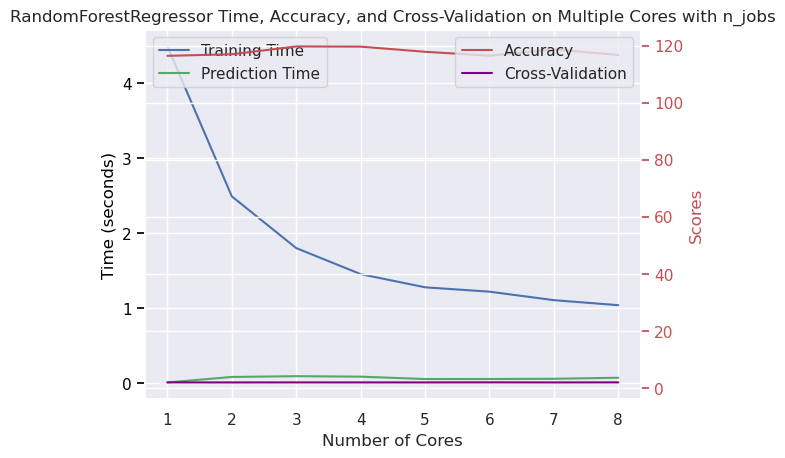

In [58]:
# Assuming X_train, Y_train, X_test, Y_test are already defined

# Encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = encoder.fit_transform(X_test[['Gender']])
X_test_encoded = np.hstack((X_test.drop(columns=['Gender']).to_numpy(), gender_encoded))

# Initialize lists to store time, accuracy, and cross-validation scores
training_times = []
prediction_times = []
accuracies = []
cv_scores = []

# Iterate over different numbers of cores
for n_cores in range(1, min(9, os.cpu_count() + 1)):  # Limit to the actual number of physical cores
    # Measure time for training
    start_time = time()
    model_parallel = RandomForestRegressor(n_jobs=n_cores)
    model_parallel.fit(X_train, Y_train)
    training_time = time() - start_time
    training_times.append(training_time)

    # Measure time for prediction
    start_time = time()
    RFR_data_prediction_parallel = model_parallel.predict(X_test_encoded)
    prediction_time = time() - start_time
    prediction_times.append(prediction_time)

    # Evaluate accuracy
    accuracy = metrics.mean_absolute_error(Y_test, RFR_data_prediction_parallel)
    accuracies.append(accuracy)
    print(f"Training Time with {n_cores} cores: {training_time} seconds")
    print(f"Prediction Time with {n_cores} cores: {prediction_time} seconds")
    print(f"Accuracy with {n_cores} cores: {accuracy}")

    # Perform cross-validation
    cross_val_scores = cross_val_score(model_parallel, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    average_cv_score = np.mean(-cross_val_scores)
    cv_scores.append(average_cv_score)
    print(f"Cross-Validation Score with {n_cores} cores: {average_cv_score}")

# Plot the results
fig, ax1 = plt.subplots()

# Plot training and prediction times on the first y-axis
ax1.plot(range(1, min(9, os.cpu_count() + 1)), training_times, label='Training Time', color='b')
ax1.plot(range(1, min(9, os.cpu_count() + 1)), prediction_times, label='Prediction Time', color='g')
ax1.set_xlabel('Number of Cores')
ax1.set_ylabel('Time (seconds)', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

# Create a second y-axis for accuracy and cross-validation
ax2 = ax1.twinx()
ax2.plot(range(1, min(9, os.cpu_count() + 1)), accuracies, label='Accuracy', color='r')
ax2.plot(range(1, min(9, os.cpu_count() + 1)), cv_scores, label='Cross-Validation', color='purple')
ax2.set_ylabel('Scores', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')

plt.title('RandomForestRegressor Time, Accuracy, and Cross-Validation on Multiple Cores with n_jobs')
plt.savefig('/home/dsc520/dsc520/dsc520-2023-nikitarego/FinalProject/Output_images/Initial plots of TIme, Accuracy and Cross-Validation/n_jobs-plot2.png')
plt.show()


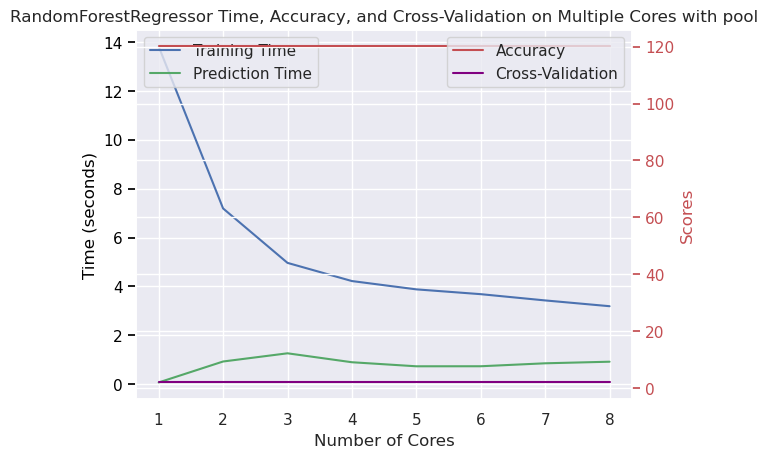

In [56]:


# Assuming X_train, Y_train, X_test, Y_test are already defined

# Encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = encoder.fit_transform(X_test[['Gender']])
X_test_encoded = np.hstack((X_test.drop(columns=['Gender']).to_numpy(), gender_encoded))

def train_predict_evaluate(n_cores):
    # Measure time for training
    start_time = time()
    model_parallel = RandomForestRegressor(n_jobs=n_cores)
    model_parallel.fit(X_train, Y_train)
    training_time = time() - start_time

    # Measure time for prediction
    start_time = time()
    RFR_data_prediction_parallel = model_parallel.predict(X_test_encoded)
    prediction_time = time() - start_time

    # Evaluate accuracy
    accuracy = metrics.mean_absolute_error(Y_test, RFR_data_prediction_parallel)

    # Perform cross-validation
    cross_val_scores = cross_val_score(model_parallel, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    average_cv_score = np.mean(-cross_val_scores)

    return n_cores, training_time, prediction_time, accuracy, average_cv_score

if __name__ == '__main__':
    # Initialize lists to store results
    results = []

    # Use Pool to parallelize the process
    with multiprocessing.Pool() as pool:
        results = pool.map(train_predict_evaluate, range(1, min(9, os.cpu_count() + 1)))

    # Unpack the results
    cores, training_times, prediction_times, accuracies, cv_scores = zip(*results)

    # Plot the results
    fig, ax1 = plt.subplots()

    # Plot training and prediction times on the first y-axis
    ax1.plot(cores, training_times, label='Training Time', color='b')
    ax1.plot(cores, prediction_times, label='Prediction Time', color='g')
    ax1.set_xlabel('Number of Cores')
    ax1.set_ylabel('Time (seconds)', color='black')
    ax1.tick_params('y', colors='black')
    ax1.legend(loc='upper left')

    # Create a second y-axis for accuracy and cross-validation
    ax2 = ax1.twinx()
    ax2.plot(cores, accuracies, label='Accuracy', color='r')
    ax2.plot(cores, cv_scores, label='Cross-Validation', color='purple')
    ax2.set_ylabel('Scores', color='r')
    ax2.tick_params('y', colors='r')
    ax2.legend(loc='upper right')

    plt.title('RandomForestRegressor Time, Accuracy, and Cross-Validation on Multiple Cores with pool')
    plt.savefig('/home/dsc520/dsc520/dsc520-2023-nikitarego/FinalProject/Output_images/Initial plots of TIme, Accuracy and Cross-Validation/Pool-plot.png')
    plt.show()


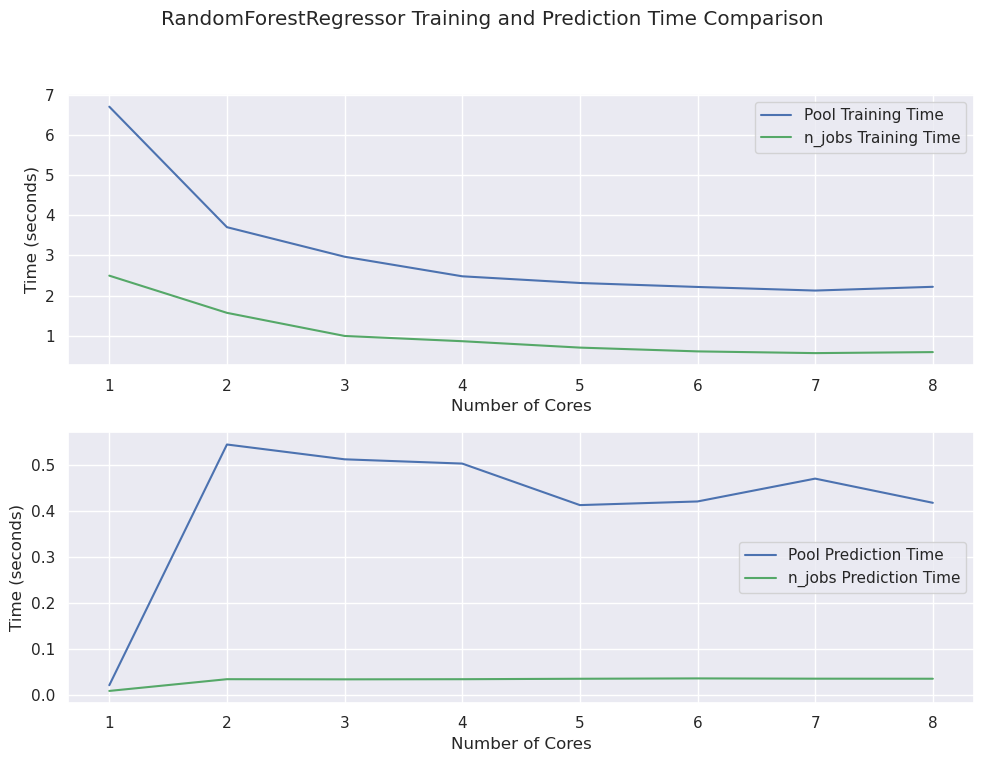

In [56]:

# Assuming X_train, Y_train, X_test, Y_test are already defined

# Encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = encoder.fit_transform(X_test[['Gender']])
X_test_encoded = np.hstack((X_test.drop(columns=['Gender']).to_numpy(), gender_encoded))

def train_predict_evaluate(n_cores):
    # Measure time for training
    start_time = time()
    model_parallel = RandomForestRegressor(n_jobs=n_cores)
    model_parallel.fit(X_train, Y_train)
    training_time = time() - start_time

    # Measure time for prediction
    start_time = time()
    RFR_data_prediction_parallel = model_parallel.predict(X_test_encoded)
    prediction_time = time() - start_time

    # Evaluate accuracy
    accuracy = metrics.mean_absolute_error(Y_test, RFR_data_prediction_parallel)

    # Perform cross-validation
    cross_val_scores = cross_val_score(model_parallel, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    average_cv_score = np.mean(-cross_val_scores)

    return n_cores, training_time, prediction_time, accuracy, average_cv_score

if __name__ == '__main__':
    # Initialize lists to store results for Pool
    pool_results = []

    # Use Pool to parallelize the process
    with multiprocessing.Pool() as pool:
        pool_results = pool.map(train_predict_evaluate, range(1, min(9, os.cpu_count() + 1)))

    # Unpack the results
    pool_cores, pool_training_times, pool_prediction_times, pool_accuracies, pool_cv_scores = zip(*pool_results)

    # Initialize lists to store results for n_jobs
    n_jobs_results = []

    # Iterate over different numbers of cores
    for n_cores in range(1, min(9, os.cpu_count() + 1)):  # Limit to the actual number of physical cores
        # Measure time for training
        start_time = time()
        model_n_jobs = RandomForestRegressor(n_jobs=n_cores)
        model_n_jobs.fit(X_train, Y_train)
        training_time = time() - start_time

        # Measure time for prediction
        start_time = time()
        RFR_data_prediction_n_jobs = model_n_jobs.predict(X_test_encoded)
        prediction_time = time() - start_time

        # Evaluate accuracy
        accuracy = metrics.mean_absolute_error(Y_test, RFR_data_prediction_n_jobs)

        # Perform cross-validation
        cross_val_scores = cross_val_score(model_n_jobs, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
        average_cv_score = np.mean(-cross_val_scores)

        n_jobs_results.append((n_cores, training_time, prediction_time, accuracy, average_cv_score))

    # Unpack the results for n_jobs
    n_jobs_cores, n_jobs_training_times, n_jobs_prediction_times, n_jobs_accuracies, n_jobs_cv_scores = zip(*n_jobs_results)

    # Plot the results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot training times
    ax1.plot(pool_cores, pool_training_times, label='Pool Training Time', color='b')
    ax1.plot(n_jobs_cores, n_jobs_training_times, label='n_jobs Training Time', color='g')
    ax1.set_xlabel('Number of Cores')
    ax1.set_ylabel('Time (seconds)')
    ax1.legend()

    # Plot prediction times
    ax2.plot(pool_cores, pool_prediction_times, label='Pool Prediction Time', color='b')
    ax2.plot(n_jobs_cores, n_jobs_prediction_times, label='n_jobs Prediction Time', color='g')
    ax2.set_xlabel('Number of Cores')
    ax2.set_ylabel('Time (seconds)')
    ax2.legend()

    plt.suptitle('RandomForestRegressor Training and Prediction Time Comparison')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



### Speedup with hyper parameter tuning

In [71]:
# Encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = encoder.fit_transform(X_test[['Gender']])
X_test_encoded = np.hstack((X_test.drop(columns=['Gender']).to_numpy(), gender_encoded))

def train_predict_evaluate(n_cores):
    # Measure time for training
    start_time = time()
    model_parallel = RandomForestRegressor(n_jobs=n_cores)
    model_parallel.fit(X_train, Y_train)
    training_time = time() - start_time

    # Measure time for prediction
    start_time = time()
    RFR_data_prediction_parallel = model_parallel.predict(X_test_encoded)
    prediction_time = time() - start_time

    # Evaluate accuracy
    accuracy = metrics.mean_absolute_error(Y_test, RFR_data_prediction_parallel)

    # Perform cross-validation
    cross_val_scores = cross_val_score(model_parallel, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    average_cv_score = np.mean(-cross_val_scores)

    return n_cores, training_time, prediction_time, accuracy, average_cv_score

if __name__ == '__main__':
    # Initialize lists to store results for Pool
    pool_results = []

    # Use Pool to parallelize the process
    with multiprocessing.Pool() as pool:
        pool_results = pool.map(train_predict_evaluate, range(1, min(9, os.cpu_count() + 1)))

    # Unpack the results for Pool
    pool_cores, pool_training_times, pool_prediction_times, pool_accuracies, pool_cv_scores = zip(*pool_results)

    # Initialize lists to store results for n_jobs
    n_jobs_results = []

    # Iterate over different numbers of cores
    for n_cores in range(1, min(9, os.cpu_count() + 1)):  # Limit to the actual number of physical cores
        # Measure time for training
        start_time = time()
        model_n_jobs = RandomForestRegressor(n_jobs=n_cores)
        model_n_jobs.fit(X_train, Y_train)
        training_time = time() - start_time

        # Measure time for prediction
        start_time = time()
        RFR_data_prediction_n_jobs = model_n_jobs.predict(X_test_encoded)
        prediction_time = time() - start_time

        # Evaluate accuracy
        accuracy = metrics.mean_absolute_error(Y_test, RFR_data_prediction_n_jobs)

        # Perform cross-validation
        cross_val_scores = cross_val_score(model_n_jobs, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
        average_cv_score = np.mean(-cross_val_scores)

        n_jobs_results.append((n_cores, training_time, prediction_time, accuracy, average_cv_score))

    # Unpack the results for n_jobs
    n_jobs_cores, n_jobs_training_times, n_jobs_prediction_times, n_jobs_accuracies, n_jobs_cv_scores = zip(*n_jobs_results)

    # Calculate speedup for each metric
    pool_training_speedup = pool_training_times[0] / np.array(pool_training_times)
    pool_prediction_speedup = pool_prediction_times[0] / np.array(pool_prediction_times)
    pool_cv_speedup = pool_cv_scores[0] / np.array(pool_cv_scores)
    pool_accuracy_speedup = pool_accuracies[0] / np.array(pool_accuracies)

    n_jobs_training_speedup = np.array(pool_training_times) / np.array(n_jobs_training_times)
    n_jobs_prediction_speedup = np.array(pool_prediction_times) / np.array(n_jobs_prediction_times)
    n_jobs_cv_speedup = np.array(pool_cv_scores) / np.array(n_jobs_cv_scores)
    n_jobs_accuracy_speedup = np.array(pool_accuracies) / np.array(n_jobs_accuracies)

    # Save each plot separately
    plots = [
        ("Training Time", n_jobs_cores, n_jobs_training_speedup, pool_training_speedup, 'Number of Cores', 'Speedup'),
        ("Prediction Time", n_jobs_cores, n_jobs_prediction_speedup, pool_prediction_speedup, 'Number of Cores', 'Speedup'),
        ("K-Fold Cross-Validation", n_jobs_cores, n_jobs_cv_speedup, pool_cv_speedup, 'Number of Cores', 'Speedup'),
        ("Accuracy", n_jobs_cores, n_jobs_accuracy_speedup, pool_accuracy_speedup, 'Number of Cores', 'Speedup')
    ]

    for title, x, y1, y2, xlabel, ylabel in plots:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(x, y1, label='n_jobs', color='g')
        ax.plot(x, y2, label='Pool', color='b', linestyle='--')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend()
        plt.title(f'RandomForestRegressor n_jobs vs Pool {title} Speedup Comparison')
        plt.tight_layout()
        plt.savefig(f'{title.replace(" ", "_").lower()}_n_jobs_vs_pool_speedup_comparison.png')
        plt.close()
